In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /home/dusan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dusan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Ucitavanje skupa podataka 

In [2]:
def make_dataset(filepath):
    df = pd.read_csv(filepath,delimiter = ';', header = None)
    df.columns = ['Text', 'Emotion']
    return df
    

In [3]:
dataset = make_dataset('../dataset/train.txt')

In [4]:
pd.options.display.max_colwidth = 1000
dataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [5]:
dataset['Emotion'].unique()
#imamo 6 razlicith emocija

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [6]:
rows,columns = dataset.shape
print(f'Num of rows: {rows}')
print(f'Num of columns: {columns}')
print(f'The dataset has the following attribute names: {list(dataset.columns)}')

Num of rows: 16000
Num of columns: 2
The dataset has the following attribute names: ['Text', 'Emotion']


In [7]:
def pie_chart(dataframe, title):
  counts = dataframe['Emotion'].value_counts()

  spacing = 1.01
  wedgeprops = {'width': spacing, 'edgecolor': 'w'}
  colors = ['#f58c8c', '#cd5f5f', '#6342bb','#c55083','#2698d3','#47b39c']
  counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', wedgeprops=wedgeprops)
  plt.title(title)
  plt.ylabel('')
  plt.show()



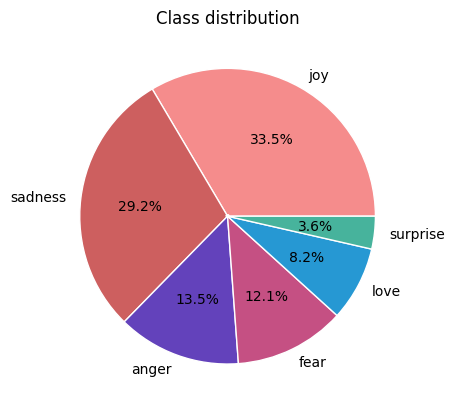

In [8]:
pie_chart(dataset,"Class distribution")

In [18]:
#primecujemo da je vecina instanci iz 2 klase

# Outlieri

Text(0.5, 1.0, 'Surprise')

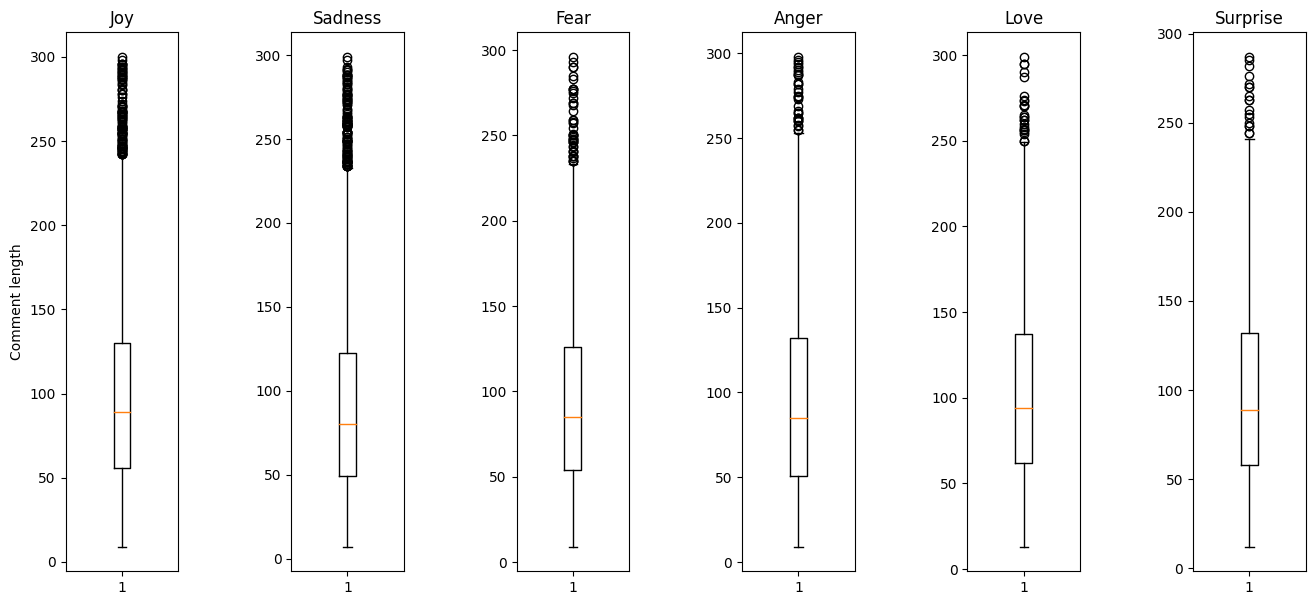

In [10]:
tweets = dataset['Text']
emotions = dataset['Emotion']

tweet_lengths = tweets.str.len()

lengths_joy = sorted(tweet_lengths[emotions == 'joy'])
lengths_sadness = sorted(tweet_lengths[emotions == 'sadness'])
lengths_fear= sorted(tweet_lengths[emotions == 'fear'])
lengths_anger = sorted(tweet_lengths[emotions == 'anger'])
lengths_love = sorted(tweet_lengths[emotions == 'love'])
lengths_surprise = sorted(tweet_lengths[emotions == 'surprise'])


fig,axes = plt.subplots(nrows = 1, ncols = 6,figsize = (16,7))
plt.subplots_adjust(wspace = 1)

plt.subplot(1,6,1)
plt.boxplot(lengths_joy)
plt.title('Joy')
plt.ylabel('Comment length')

plt.subplot(1,6,2)
plt.boxplot(lengths_sadness)
plt.title('Sadness')

plt.subplot(1,6,3)
plt.boxplot(lengths_fear)
plt.title('Fear')

plt.subplot(1,6,4)
plt.boxplot(lengths_anger)
plt.title('Anger')

plt.subplot(1,6,5)
plt.boxplot(lengths_love)
plt.title('Love')

plt.subplot(1,6,6)
plt.boxplot(lengths_surprise)
plt.title('Surprise')

In [59]:
#Primecujemo da su  za sve kategorije tekstovi priblizno istih duzina i vrednosti van granica krecu od 
#oko 225-250 reci pa navise
#mozd ne treba da izbacim outliere za sve osim prva 2 jer ih ima malo i ovako
#mozda ne izbacujem nigde jer je duzina svih manja od 300 pa nista ne odstupa previse

In [11]:
dataset = dataset.loc[~((dataset['Emotion'] == 'joy') & (dataset['Text'].str.len() > 240))]
dataset = dataset.loc[~((dataset['Emotion'] == 'sadness') & (dataset['Text'].str.len() > 225))]
dataset = dataset.loc[~((dataset['Emotion'] == 'fear') & (dataset['Text'].str.len() > 225))]
dataset = dataset.loc[~((dataset['Emotion'] == 'anger') & (dataset['Text'].str.len() > 250))]
dataset = dataset.loc[~((dataset['Emotion'] == 'love') & (dataset['Text'].str.len() > 250))]
dataset = dataset.loc[~((dataset['Emotion'] == 'surprise') & (dataset['Text'].str.len() > 240))]

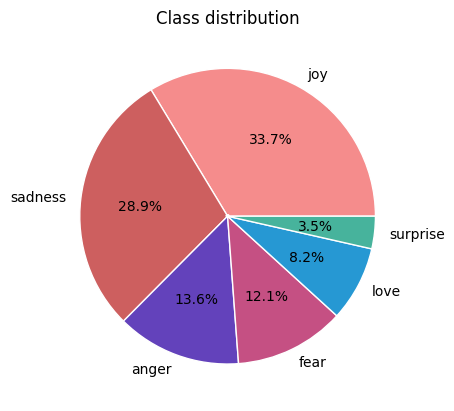

In [12]:
pie_chart(dataset,"Class distribution")

(array([ 40., 214., 356., 361., 421., 414., 402., 391., 415., 300., 347.,
        225., 279., 192., 182., 152., 111.,  94.,  95.,  75.,  70.,  46.,
         32.,  37.,  31.,  24.,  19.,  10.,  13.,  14.]),
 array([  9. ,  18.7,  28.4,  38.1,  47.8,  57.5,  67.2,  76.9,  86.6,
         96.3, 106. , 115.7, 125.4, 135.1, 144.8, 154.5, 164.2, 173.9,
        183.6, 193.3, 203. , 212.7, 222.4, 232.1, 241.8, 251.5, 261.2,
        270.9, 280.6, 290.3, 300. ]),
 <BarContainer object of 30 artists>)

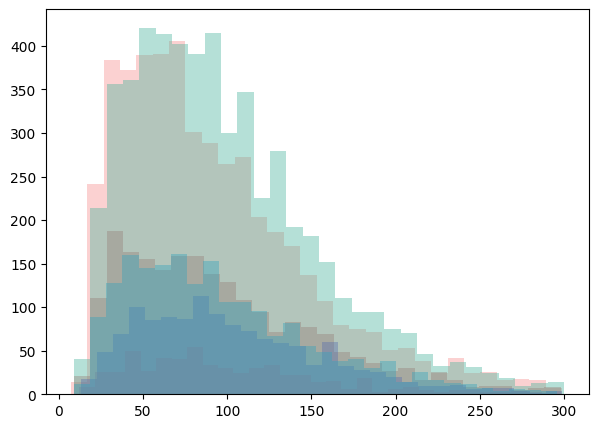

In [13]:
plt.figure(figsize=(7, 5))

plt.hist(lengths_sadness, bins=30, color='#f58c8c', alpha=0.4, label='Joy')
plt.hist(lengths_anger, bins=30, color='#cd5f5f', alpha=0.4, label='Joy')
plt.hist(lengths_love, bins=30, color='#6342bb', alpha=0.4, label='Joy')
plt.hist(lengths_surprise, bins=30, color='#c55083', alpha=0.4, label='Joy')
plt.hist(lengths_fear, bins=30, color='#2698d3', alpha=0.4, label='Joy')
plt.hist(lengths_joy, bins=30, color='#47b39c', alpha=0.4, label='Joy')

#deluje da je raspodela duzine tvitova priblizno ista za svaku klasu

# Nedostajuce vrednosti


In [14]:


dataset.isna().any().any()



False

In [82]:
#nema nedostajucih vrednosti


# Pretprocesiranje

In [ ]:
#mala slova > beline i znakovi >ponovljena slova > tokenizacija > filer reci > skracivanje > min duzina


In [15]:
def preprocess_dataset(sentence):
    sentence = str(sentence)
    #sentence = sentence.lower() #mala slova
    cleanr = re.compile(r'[^A-Za-z \']+')
    cleantext = re.sub(cleanr, ' ', sentence) #izbaci sve sto nije obican karakter 
    cleantext = re.sub(r"\b\d+\b", "", cleantext) #izbaci brojeve koji se ne pojavljuju unutar neke reci
    cleantext = re.sub(r'\b\w*([a-zA-Z])\1{2,}\w*\b', "", cleantext) #izbaci reci koje sadrze 3 ili vise uzastopna ponavljanja istog slova
    common_stopwords = set(stopwords.words('english'))
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(cleantext)
    
    tokens = [t for t in tokens if not t in common_stopwords]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    tokens = [token for token in tokens if len(token) >= 3]

    return tokens

In [23]:
#!pip install spacy
!python3 -m spacy download en_core_web_sm

2023-08-30 10:56:43.263948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.9 MB/s eta 0:00:00m eta 0:00:010:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [50]:


import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_dataset(sentence):
    sentence = str(sentence)
    cleanr = re.compile(r'[^A-Za-z \']+')
    cleantext = re.sub(cleanr, ' ', sentence)
    cleantext = re.sub(r"\b\d+\b", "", cleantext)
    cleantext = re.sub(r'\b\w*([a-zA-Z])\1{2,}\w*\b', "", cleantext)
    common_stopwords = set(stopwords.words('english'))
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(cleantext)
    
    tokens = [t for t in tokens if not t in common_stopwords]
    
    lemmatized_tokens = []
    for token in nlp(" ".join(tokens)):
        lemmatized_tokens.append(token.lemma_)
    
    lemmatized_tokens = [token for token in lemmatized_tokens if len(token) >= 3]
    
    return " ".join(lemmatized_tokens)

df = dataset.copy()
df["Processed"] = df["Text"].apply(preprocess_dataset)
df = df[df["Processed"] != ""]



# Prikaz procesovanog teksta


In [54]:
#df = dataset.copy()
#df["Processed "] = df["Text"].apply(preprocess_dataset).apply(lambda x: " ".join(x))


df_show = df.drop('Emotion', axis=1)
df_show

,Text,Processed
0,i didnt feel humiliated,not feel humiliate
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,feel hopeless damned hopeful around someone care awake
2,im grabbing a minute to post i feel greedy wrong,grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,feel grouchy
...,...,...
15995,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree,turn feel pathetic still wait table sub teaching degree
15997,i feel strong and good overall,feel strong good overall
15998,i feel like this was such a rude comment and im glad that t,feel like rude comment glad


# Priprema za klasifikaciju

In [52]:
lable = preprocessing.LabelEncoder()
y=dataset['Emotion']
y=lable.fit_transform(y)

vectorizer = TfidfVectorizer(max_features=8000)
tfidf_matrix = vectorizer.fit_transform(df["Processed"])

# izvlacenje imena kolona
tfidf_feature_names = vectorizer.get_feature_names_out()

# konacna reprezentacija za model
tfidf_df = pd.concat([pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names),
                             pd.DataFrame(y)], axis=1)

tfidf_df.head(10)

,aaron,abandon,abandonment,abate,abbigail,abc,abdoman,abdomen,abdominal,abelard,...,zipline,zoll,zombie,zone,zonisamide,zoo,zoom,zucchini,zumba,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [53]:


tfidf_df.to_csv('train_data.csv', index=False)



# Primena pretprocesiranja na test skup

In [55]:
test_dataset = make_dataset('../dataset/test.txt')

In [56]:


rows, columns = test_dataset.shape
print(f'Num of rows: {rows}')
print(f'Num of columns: {columns}')



Num of rows: 2000
Num of columns: 2


In [57]:
test_df = test_dataset.copy()
test_df["Processed"] = test_df["Text"].apply(preprocess_dataset).apply(lambda x: " ".join(x))
test_df = test_df[test_df["Processed"] != ""]

In [58]:
y=test_df['Emotion']
y=lable.fit_transform(y)
tfidf_test_matrix = vectorizer.transform(test_df["Processed"])

test_tfidf_feature_names = vectorizer.get_feature_names_out()

test_tfidf_df = pd.concat([pd.DataFrame(tfidf_test_matrix.toarray(), columns=test_tfidf_feature_names),
                             pd.DataFrame(y)], axis=1)

test_tfidf_df.to_csv('test_data.csv', index=False)

In [59]:
test_tfidf_df.head()

,aaron,abandon,abandonment,abate,abbigail,abc,abdoman,abdomen,abdominal,abelard,...,zipline,zoll,zombie,zone,zonisamide,zoo,zoom,zucchini,zumba,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4



# Priprema za klasterovanje

In [61]:
df = dataset.copy()
test_df = test_dataset.copy()


combined_df = pd.concat([df, test_df])
combined_df.reset_index(drop=True, inplace=True)
combined_df.shape
combined_df.head()


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [ ]:
combined_df["Processed"] = combined_df["Text"].apply(preprocess_dataset).apply(lambda x: " ".join(x))
combined_df.head(20)
combined_df = combined_df[combined_df["Processed"] != ""]
combined_df.head(20)
vectorizer = TfidfVectorizer(max_features=8000)
tfidf_cluster = vectorizer.fit_transform(combined_df["Text"])
tfidf_feature_names = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame(tfidf_cluster.toarray(), columns=tfidf_feature_names)

cluster_df.head(10)

In [64]:
combined_df["Processed"] = combined_df["Text"].apply(preprocess_dataset).apply(lambda x: " ".join(x))
combined_df.head(20)
combined_df = combined_df[combined_df["Processed"] != ""]
combined_df.head(20)
vectorizer = TfidfVectorizer(max_features=8000)
tfidf_cluster = vectorizer.fit_transform(combined_df["Text"])
tfidf_feature_names = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame(tfidf_cluster.toarray(), columns=tfidf_feature_names)

cluster_df.head(10)

,aa,abandon,abandoned,abandoning,abandonment,abc,abdomen,abide,abilities,ability,...,zach,zealand,zen,zero,zimbabwe,zombie,zombies,zone,zooming,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
